# Clustering 2D points

From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the '.predict()' method.

You are given the array 'points' from the previous exercise, and also an array 'new_points.'

**Instructions**
- Import KMeans from sklearn.cluster.
- Using KMeans(), create a KMeans instance called model to find 3 clusters. To specify the number of clusters, use the n_clusters keyword argument.
- Use the .fit() method of model to fit the model to the array of points points.
- Use the .predict() method of model to predict the cluster labels of new_points, assigning the result to labels.
- Hit 'Submit Answer' to see the cluster labels of new_points.


In [1]:
import pandas as pd

df = pd.read_csv(
    'https://s3.amazonaws.com/assets.datacamp.com/production/course_2072/datasets/3-point-clouds-in-2d.csv', 
    header=None)
data = df.values
N = 300
points = data[:N,:]
new_points = data[N:,:]


In [4]:
data.shape, points.shape, new_points.shape

((600, 2), (300, 2), (300, 2))

In [5]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters = 3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)


[1 2 0 1 2 1 2 2 2 0 1 2 2 0 0 2 0 0 2 2 0 2 1 2 1 0 2 0 0 1 1 2 2 2 0 1 2
 2 1 2 0 1 1 0 1 2 0 0 2 2 2 2 0 0 1 1 0 0 0 1 1 2 2 2 1 2 0 2 1 0 1 1 1 2
 1 0 0 1 2 0 1 0 1 2 0 2 0 1 2 2 2 1 2 2 1 0 0 0 0 1 2 1 0 0 1 1 2 1 0 0 1
 0 0 0 2 2 2 2 0 0 2 1 2 0 2 1 0 2 0 0 2 0 2 0 1 2 1 1 2 0 1 2 1 1 0 2 2 1
 0 1 0 2 1 0 0 1 0 2 2 0 2 0 0 2 2 1 2 2 0 1 0 1 1 2 1 2 2 1 1 0 1 1 1 0 2
 2 1 0 1 0 0 2 2 2 1 2 2 2 0 0 1 2 1 1 1 0 2 2 2 2 2 2 0 0 2 0 0 0 0 2 0 0
 2 2 1 0 1 1 0 1 0 1 0 2 2 0 2 2 2 0 1 1 0 2 2 0 2 0 0 2 0 0 1 0 1 1 1 2 0
 0 0 1 2 1 0 1 0 0 2 1 1 1 0 2 2 2 1 2 0 0 2 1 1 0 1 1 0 1 2 1 0 0 0 0 2 0
 0 2 2 1]


# Inspect your clustering

Let's now inspect the clustering you performed in the previous exercise!

A solution to the previous exercise has already run, so new_points is an array of points and labels is the array of their cluster labels.

**Instructions**
- Import matplotlib.pyplot as plt.
- Assign column 0 of new_points to xs, and column 1 of new_points to ys.
- Make a scatter plot of xs and ys, specifying the c=labels keyword arguments to color the points by their cluster label. Also specify alpha=0.5.
- Compute the coordinates of the centroids using the .cluster_centers_ attribute of model.
- Assign column 0 of centroids to centroids_x, and column 1 of centroids to centroids_y.
- Make a scatter plot of centroids_x and centroids_y, using 'D' (a diamond) as a marker by specifying the marker parameter. Set the size of the markers to be 50 using 's=50'.


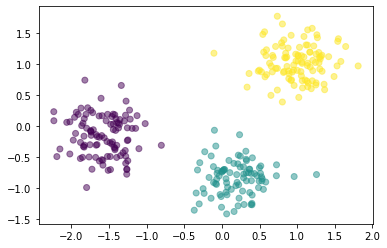

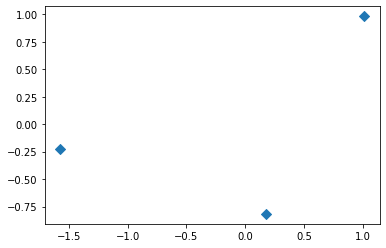

In [8]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)
plt.show()
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()


# How many clusters of grain?

In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

KMeans and PyPlot (plt) have already been imported for you.

This dataset was sourced from the UCI Machine Learning Repository.

**Instruction**

- For each of the given values of k, perform the following steps:
- Create a KMeans instance called model with kclusters.
- Fit the model to the grain data samples.
- Append the value of the inertia_ attribute of modelto the list inertias.
- The code to plot ks vs inertias has been written for you, so hit 'Submit Answer' to see the plot!
 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv(
    'https://s3.amazonaws.com/assets.datacamp.com/production/course_2234/datasets/seeds.csv', 
    header=None)


In [14]:
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [19]:
samples = df[list(range(7))].values
samples, type(samples)

(array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
        [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
        [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
        ...,
        [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
        [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
        [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]]),
 numpy.ndarray)

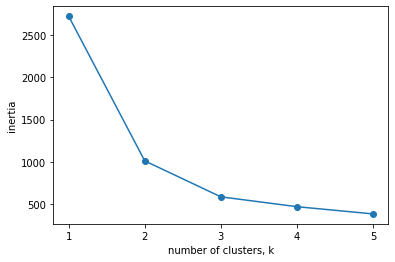

In [21]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


# Evaluating the grain clustering

In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array samples of grain samples, and a list varieties giving the grain variety for each sample. Pandas (pd) and KMeans have already been imported for you.

**Instructions**

- Create a KMeans model called model with 3 clusters.
- Use the .fit_predict() method of model to fit it to samples and derive the cluster labels. Using .fit_predict() is the same as using .fit() followed by .predict().
- Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values. This has been done for you.
- Use the pd.crosstab() function on df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label. Assign the result to ct.
- Hit 'Submit Answer' to see the cross-tabulation!


In [22]:
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2234/datasets/seeds.csv', header=None)
samples = df[list(range(7))].values
varieties = list(df[7].map({1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'}))

In [26]:
df

,labels,varieties
0,2,Kama wheat
1,2,Kama wheat
2,2,Kama wheat
3,2,Kama wheat
4,2,Kama wheat
...,...,...
205,0,Canadian wheat
206,0,Canadian wheat
207,0,Canadian wheat
208,0,Canadian wheat


In [23]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                      68           9           0
1                       0           1          60
2                       2          60          10


# Scaling fish data for clustering

You are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the Journal of Statistics Education.

**Instruction**

- Import:
        make_pipeline from sklearn.pipeline.
        StandardScaler from sklearn.preprocessing.
        KMeans from sklearn.cluster.
- Create an instance of StandardScaler called scaler.
- Create an instance of KMeans with 4 clusters called kmeans.
- Create a pipeline called pipeline that chains scalerand kmeans. To do this, you just need to pass them in as arguments to make_pipeline().
 

In [27]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

# Clustering the fish data

You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

As before, samples is the 2D array of fish measurements. Your pipeline is available as pipeline, and the species of every fish sample is given by the list species.

**Instruction**

- Import pandas as pd.
- Fit the pipeline to the fish measurements samples.
- Obtain the cluster labels for samples by using the .predict() method of pipeline.
- Using pd.DataFrame(), create a DataFrame df with two columns named 'labels' and 'species', using labels and species, respectively, for the column values.
- Using pd.crosstab(), create a cross-tabulation ct of df['labels'] and df['species'].
 

In [29]:
import pandas as _pd

df = _pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2234/datasets/fish.csv', header=None)
df

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


In [36]:
samples  = df[list(range(1,len(df.columns)))].values
species = list(df[0])

In [38]:
# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)
# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)


species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            0     0      0     13
2            0    17      0      0
3            1     0     19      1


# Clustering stocks using KMeans

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array -movements- of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() standardizes features(such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

KMeans and make_pipeline have already been imported for you.

**Instruction**

- Import Normalizer from sklearn.preprocessing.
- Create an instance of Normalizer called normalizer.
- Create an instance of KMeans called kmeans with 10clusters.
- Using make_pipeline(), create a pipeline called pipeline that chains normalizer and kmeans.
- Fit the pipeline to the movements array.
 

In [42]:
import pandas as pd

df = pd.read_csv(
        'https://s3.amazonaws.com/assets.datacamp.com/production/course_2072/datasets/company-stock-movements-2010-2015-incl.csv', 
        index_col=0
    )
df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [54]:
companies = list(df.index)
movements = df.values

In [56]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

# Which stocks move together?

In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

Your solution to the previous exercise has already been run. Recall that you constructed a Pipeline pipeline containing a KMeans model and fit it to the NumPy array movements of daily stock movements. In addition, a list companies of the company names is available.

**Instruction**

- Import pandas as pd.
- Use the .predict() method of the pipeline to predict the labels for movements.
- Align the cluster labels with the list of company names companies by creating a DataFrame df with labels and companies as columns. This has been done for you.
- Use the .sort_values() method of df to sort the DataFrame by the 'labels' column, and print the result.
- Hit 'Submit Answer' and take a moment to see which companies are together in each cluster!


In [58]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                           companies
43       0                                 SAP
22       0                                  HP
21       0                               Honda
58       0                               Xerox
33       0                           Microsoft
34       0                          Mitsubishi
15       0                                Ford
14       0                                Dell
11       0                               Cisco
45       0                                Sony
24       0                               Intel
47       0                            Symantec
7        0                               Canon
48       0                              Toyota
50       0  Taiwan Semiconductor Manufacturing
51       0                   Texas instruments
2        0                              Amazon
36       1                    Northrop Grumman
4        1                              Boeing
29       1                     Lookheed Martin
25       2   